In [75]:
import pandas as pd
import matplotlib.pyplot as plt 

###1. Load the Data:

In [76]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Explore the Dataset: 

In [77]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### Data Selection

In [79]:
new_df = df[['Annual Income (k$)', 'Spending Score (1-100)']]

###  Initial Visualization

Text(0.5, 1.0, 'Income vs Spending Score')

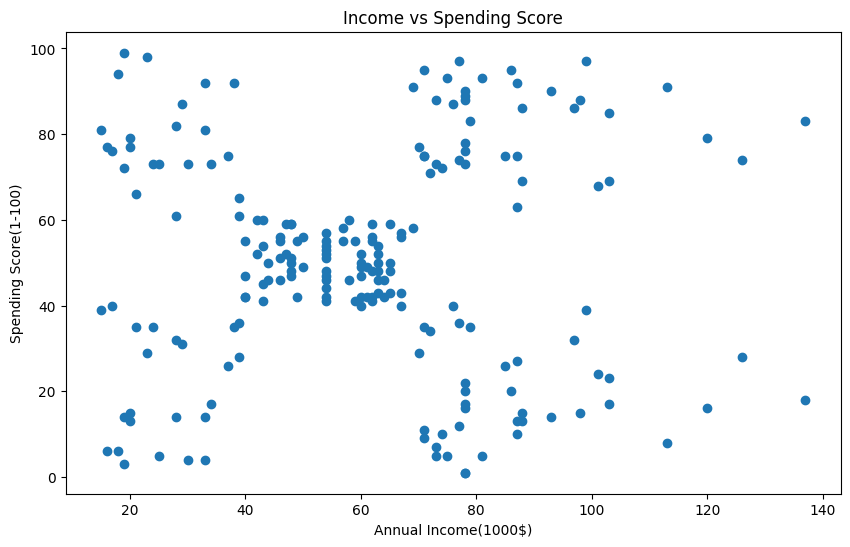

In [80]:
plt.figure(figsize=(10,6))
plt.scatter(new_df['Annual Income (k$)'], new_df['Spending Score (1-100)'])
plt.xlabel('Annual Income(1000$)')
plt.ylabel('Spending Score(1-100)')
plt.title("Income vs Spending Score")

### Part 2: K-Means Clustering 
#### 1. Finding the Optimal Number of Clusters (k):

In [81]:
from sklearn.cluster import KMeans
import numpy as np

Text(0, 0.5, 'wcss')

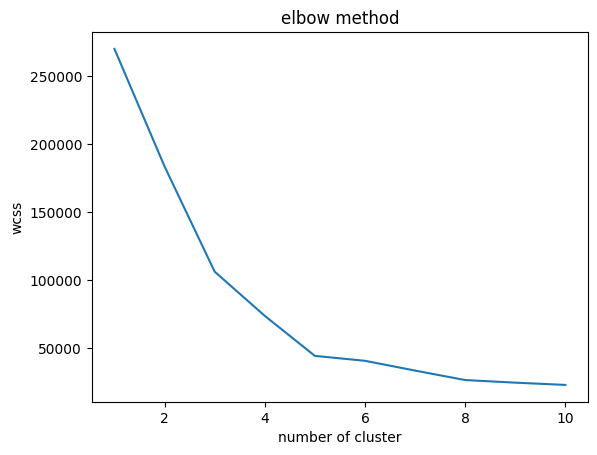

In [82]:
X=new_df.values
w=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,init='k-means++',random_state=42)
  km.fit(X)
  w.append(km.inertia_)
plt.plot(range(1,11),w)
plt.title('elbow method')
plt.xlabel('number of cluster')
plt.ylabel('wcss')

2.  ### Applying K-Means:

In [83]:
km=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_km=km.fit_predict(X)

###  Visualize K-Means Results: 

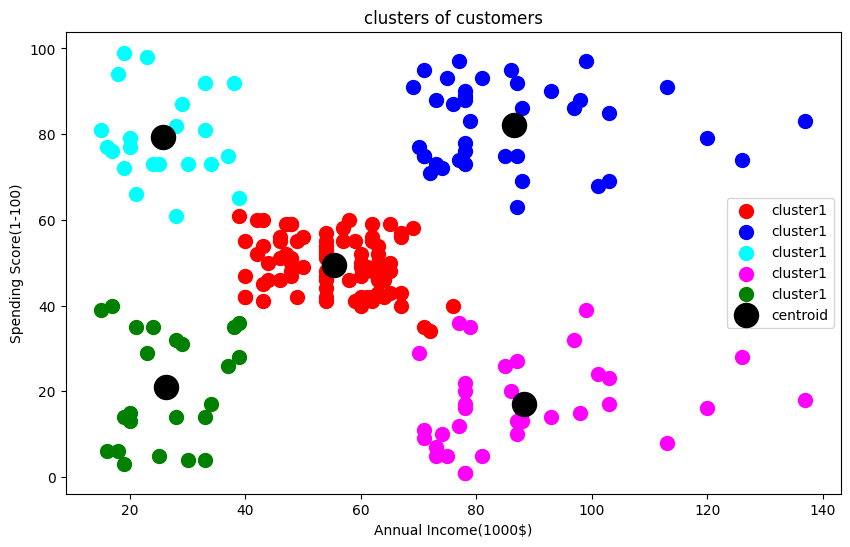

In [84]:
plt.figure(figsize=(10,6))
plt.scatter(X[y_km==0,0],X[y_km==0,1],s=100,c='red',label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],s=100,c='blue',label='cluster1')
plt.scatter(X[y_km==2,0],X[y_km==2,1],s=100,c='cyan',label='cluster1')
plt.scatter(X[y_km==3,0],X[y_km==3,1],s=100,c='magenta',label='cluster1')
plt.scatter(X[y_km==4,0],X[y_km==4,1],s=100,c='green',label='cluster1')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=300,c='black',label='centroid')
plt.title('clusters of customers')
plt.xlabel('Annual Income(1000$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

### 1.. Creating a Dendrogram:

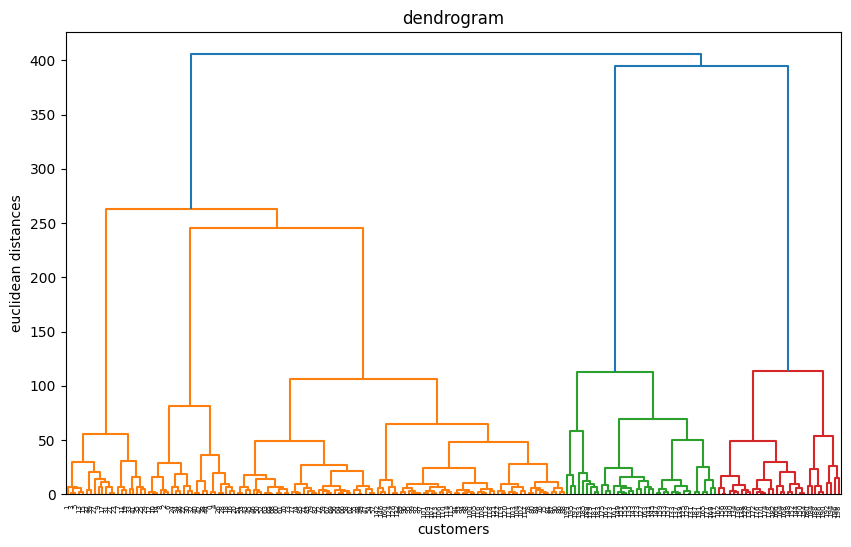

In [85]:
from scipy.cluster.hierarchy import linkage,dendrogram

link=linkage(X,method='ward')
plt.figure(figsize=(10,6))
dendrogram(link)
plt.title('dendrogram')
plt.xlabel('customers')
plt.ylabel('euclidean distances')
plt.show()

### 2. Applying Hierarchical Clustering:

In [86]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)

### 3. Visualize Hierarchical Clustering Results

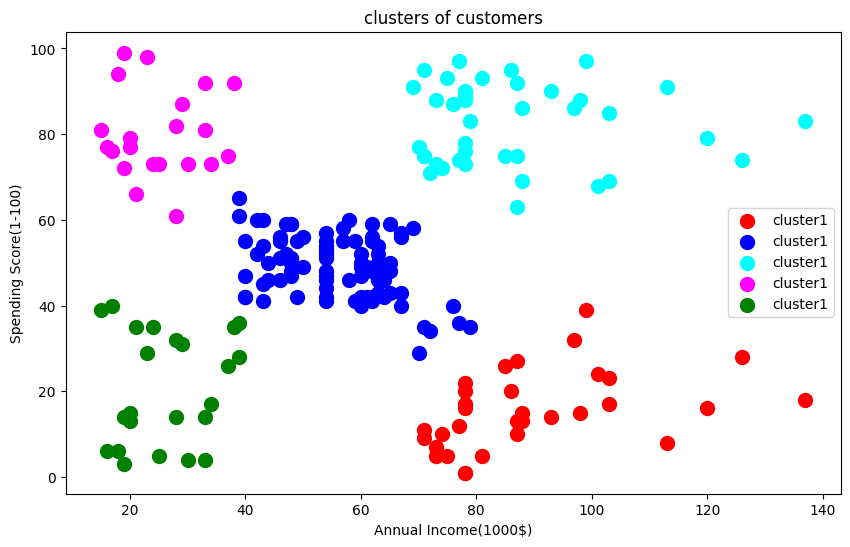

In [87]:
plt.figure(figsize=(10,6))
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='red',label='cluster1')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='blue',label='cluster1')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='cyan',label='cluster1')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='magenta',label='cluster1')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=100,c='green',label='cluster1')
plt.title('clusters of customers')
plt.xlabel('Annual Income(1000$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

### Part 4: DBSCAN Clustering 
#### 1. Applying DBSCAN

In [105]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

X_scaled= StandardScaler().fit_transform(X)
dbscan=DBSCAN(eps=0.5,min_samples=14)
y_db=dbscan.fit_predict(X_scaled)

#### 2. Visualize DBSCAN Results

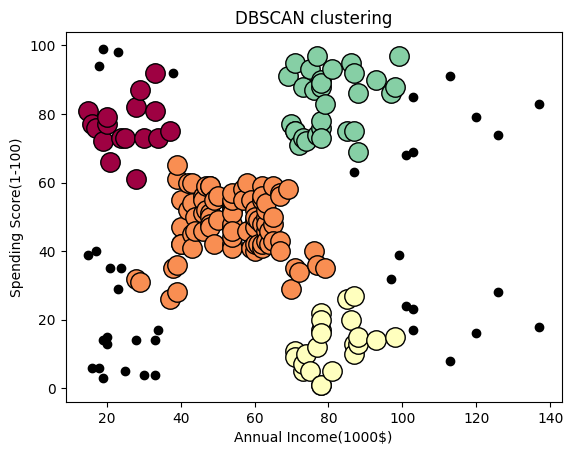

In [106]:
unique=set(y_db)
color=[plt.cm.Spectral(each) for each in np.linspace(0,1,len(unique))]
for k,c in zip(unique,color):
  if k==-1:
    c=[0,0,0,1]
  class_member_mask=(y_db==k)
  xy=X[class_member_mask]
  plt.plot(xy[:,0],xy[:,1],'o',markerfacecolor=tuple(c),markeredgecolor='k',markersize=14 if k!=-1 else 6)
plt.title('DBSCAN clustering')
plt.xlabel('Annual Income(1000$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

### REPORT IN REPORT PDF